In [2]:
import mlxtend
import numpy as np
import pandas as pd

In [3]:
data=np.array([
    ['egg','noodle','tuna'],
    ['noodle','rice'],
    ['noodle','coke'],
    ['egg','noodle','rice'],
    ['egg','coke'],
    ['noodle','coke'],
    ['noodle','rice'],
    ['egg','noodle','coke','tuna'],
    ['egg','noodle','coke'],
    ['onion']
])

C:\Users\rangc\AppData\Local\Temp\ipykernel_2944\1949456513.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array([


### 원핫인코딩

In [4]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
df=te.fit(data).transform(data)
df=pd.DataFrame(df,columns=te.columns_)
df

,coke,egg,noodle,onion,rice,tuna
0,False,True,True,False,False,True
1,False,False,True,False,True,False
2,True,False,True,False,False,False
3,False,True,True,False,True,False
4,True,True,False,False,False,False
5,True,False,True,False,False,False
6,False,False,True,False,True,False
7,True,True,True,False,False,True
8,True,True,True,False,False,False
9,False,False,False,True,False,False


### Ariori 알고리즘
- 모든 아이템셋 경우의 수를 다 평가하기에는 불가능.(너무 많은 조합)
- 최소 지지도를 만족하지 못하는 아이템셋은 제거해버리면서 아이템셋 집합을 축소시키는 작업.
- frequent item sets에 대해서만 평가를 진행.

In [5]:
from mlxtend.frequent_patterns import apriori, association_rules
apriori=apriori(df, min_support=0.2, use_colnames=True)
apriori

,support,itemsets
0,0.5,(coke)
1,0.5,(egg)
2,0.8,(noodle)
3,0.3,(rice)
4,0.2,(tuna)
5,0.3,"(egg, coke)"
6,0.4,"(coke, noodle)"
7,0.4,"(egg, noodle)"
8,0.2,"(egg, tuna)"
9,0.3,"(rice, noodle)"


In [6]:
association_rules=association_rules(apriori)
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(coke),(noodle),0.5,0.8,0.4,0.8,1.00,0.00,1.0
1,(egg),(noodle),0.5,0.8,0.4,0.8,1.00,0.00,1.0
2,(tuna),(egg),0.2,0.5,0.2,1.0,2.00,0.10,inf
3,(rice),(noodle),0.3,0.8,0.3,1.0,1.25,0.06,inf
4,(tuna),(noodle),0.2,0.8,0.2,1.0,1.25,0.04,inf
5,"(egg, tuna)",(noodle),0.2,0.8,0.2,1.0,1.25,0.04,inf
6,"(tuna, noodle)",(egg),0.2,0.5,0.2,1.0,2.00,0.10,inf
7,(tuna),"(egg, noodle)",0.2,0.4,0.2,1.0,2.50,0.12,inf


In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
from matplotlib.colors import LinearSegmentedColormap

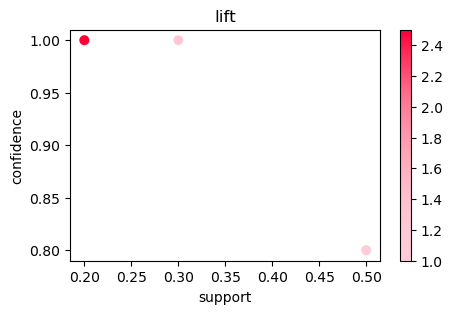

In [9]:
#시각화
support=association_rules['antecedent support']
confidence=association_rules['confidence']
lift=association_rules['lift']
h = 347
s = 1
v = 1
colors = [
    mcl.hsv_to_rgb((h/360, 0.2, v)),
    mcl.hsv_to_rgb((h/360, 0.55, v)),
    mcl.hsv_to_rgb((h/360, 1, v))
]
cmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=2)
plt.figure(figsize=(5,3))
scatter=plt.scatter(support,confidence,c=lift,cmap=cmap)

plt.colorbar(scatter)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('lift')

plt.show()

# 1. (tuna)->(noodle,egg)의 경우 confidence=1, lift=2.5로 높지만 support=0.2로 낮음.
# 2. (coke)->(noodle)의 경우 support는 높지만, confidence와 lift는 비교적 낮음.
# 첫번째와 두번째 규칙 중에 어떤 것이 더 우월하다고 말하기는 힘듦.
# 첫번째 규칙의 경우 tuna를 구입하는 조건 자체가 비율이 낮지만, tuna를 구입하는 조건만 만족한다면 다른 것들도 함께 구매할 효과가 높아보임.
# 두번째 규칙은 많이 구입되지만, 그것에 비해 효과가 높지는 않다. 
# 도메인 영역에 따라 어떤 기준을 더 중요한지가 다름. 

### FP-Growth 알고리즘
- 트리구조를 사용하여 apriori의 느린 속도를 보다 개선한 알고리즘

In [41]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth=fpgrowth(df, min_support=0.2, use_colnames=True)
fpgrowth

,support,itemsets
0,0.8,(noodle)
1,0.5,(egg)
2,0.2,(tuna)
3,0.3,(rice)
4,0.5,(coke)
5,0.4,"(noodle, egg)"
6,0.2,"(egg, tuna)"
7,0.2,"(noodle, tuna)"
8,0.2,"(noodle, egg, tuna)"
9,0.3,"(noodle, rice)"


In [42]:
%%time
from mlxtend.frequent_patterns import apriori
apriori=apriori(df, min_support=0.2, use_colnames=True)

CPU times: total: 0 ns
Wall time: 12 ms


In [43]:
%%time
from mlxtend.frequent_patterns import fpgrowth
fpgrowth=fpgrowth(df, min_support=0.2, use_colnames=True) #더빠른속도

CPU times: total: 15.6 ms
Wall time: 5.61 ms
